# Day 2 Exercises (NumPy + Matplotlib)

## Part 1: Basic NumPy Operations
a) Generate an array of numbers 0-24. Reshape to a 5x5 matrix.

In [1]:
import numpy as np

mat = np.arange(25).reshape(5,5)
print(mat)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


b) Extract the diagonal of this matrix.

In [2]:
diag = np.diag(mat)
print(diag)

[ 0  6 12 18 24]


c) Multiply the matrix by an identity matrix of the same shape. Confirm that it is identical to the original.

Hint: Use `np.all` command to confirm all equal. 

In [3]:
## Construct identity matrix.
identity = np.identity(5)

## Matrix multiplication.
mat2 = mat @ identity

## Confirm all equal.
print( np.all(mat == mat2) )

True


d) Join the matrix with itself and return a new matrix with shape (2,5,5).

In [4]:
## Join matrices.
mat3 = np.array([mat, mat])
print(mat3.shape)

(2, 5, 5)


e) Compute the mean of the concatenated matrix along the first axis. Confirm its equal to the original matrix.

In [5]:
## Take mean.
mat3 = mat3.mean(axis=0)

## Confirm all equal.
print( np.all(mat == mat3) )

True


f) Return the indices of the matrix where the elements are greater than 15.

In [6]:
i,j = np.where(mat > 15)
print(i,j)

[3 3 3 3 4 4 4 4 4] [1 2 3 4 0 1 2 3 4]


g) Using `np.where`, set all elements of the matrix greater than 15 to 1, else 0.


In [7]:
## Binarize matrix (v1).
mat4 = (mat > 15).astype(int)

## Binarize matrix (v2).
mat4 = np.where(mat > 15, 1, 0)

h) Set all elements of the matrix greater than 15 to 2, less than 5 to 1, else 0.

Hint: `np.where` can be passed as an input to `np.where`.

In [8]:
## Trinarize matrix.
mat5 = np.where(mat > 15, 2, np.where(mat < 5, 1, 0))

i) Return the lower triangle of the original matrix.

In [9]:
tril = np.tril(mat)
print(tril)

[[ 0  0  0  0  0]
 [ 5  6  0  0  0]
 [10 11 12  0  0]
 [15 16 17 18  0]
 [20 21 22 23 24]]


j) Define a demean function.

In [10]:
def demean(arr):
    """De-mean array."""
    return arr - np.mean(arr)

k) Apply the demean function across each row of the matrix.

In [11]:
## Demean each row.
mat6 = np.apply_along_axis(demean, 1, mat)
print(mat6)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]


l) Implement vector projection.

We'll do this by replicating the figure at the top of Page 6 of our linear algebra intro slides. That means we'll make the projection of $v$ onto $u$, as well as the residual vector. Can you verify that the residual vector is orthogonal to the unit vector $u$?

In [ ]:
def plot_vector(vector, start=np.array([0, 0]), color='k', **kwargs):
    # This little function is a light wrapper over a matplotlib
    # function for drawing arrows. See docs for more options.
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html#matplotlib.pyplot.arrow
    plt.arrow(
        start[0], start[1], vector[0], vector[1],
        head_width=.05, color=color, length_includes_head=True,
        **kwargs)

# This is handy since it makes right angles easier to see.
plt.axis('equal')

u = np.array([1, .3])
u = u / norm(u)
plot_vector(u, color='red', label='projected onto')

v = np.array([1, 1.2])
plot_vector(v, color='green', label='original')

## SOLUTION CODE START
projected = u@v * u
plot_vector(projected, color='blue', label='projected')

residual = v - projected
plot_vector(residual, start=projected, color='purple', label='residual')

print('dot product of residual and u (will be 0 or very close since they are orthogonal):', residual@u)
## SOLUTION CODE END

plt.legend()

m) Can you find a vector that's orthogonal to $[1.25, 1.75]$?

In [ ]:
v = np.array([1.25, 1.75])

# SOLUTION START
orthogonal_vector = np.array([1.75, -1.25])
# SOLUTION END

assert np.isclose(v@orthogonal_vector, 0)

## Part 2: Spike Detection

In the following exercises, you will be manipulating, analyzing, and visualizing preprocessed extracellular electrophysiological data. Specifically, you will be working with a 10s recording taken from a [nerve in the abdomen of a crayfish](https://www.science.smith.edu/departments/neurosci/courses/bio330/labs/L7pix/hookelectr.jpg). Action potentials are visually apparent throughout the entire recording. 

This exercise will focus primarily on the problem of **spike detection**. Before diving in, we recommend you take a few moments to skim [Rey et al. (2015)](https://www.sciencedirect.com/science/article/pii/S0361923015000684), which will help frame the problem and describe the steps involved. Specifically, we recommend reading up to and including Section 2.2, *Spike Detection*.

First, we load the data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data.
npz = np.load('spikes.npz')   # spikes.npz is a compressed NumPy object containing the data.
data = npz['data'] * 1e6      # data is the recording itself, which we convert to microvolts.
times = npz['times']          # times contains the timestamp for each sample of recording.

a) First, check the metadata of *data* and *times*. How many samples (elements) are in *data*? How long (in seconds) is the recording? 

In [13]:
print('n_samples:', data.size)
print('time (s):', times.max())

n_samples: 100001
time (s): 10.0


b) Plot the entire raw recording with time (in seconds) on the x-axis and voltage (in microvolts) on the y-axis. 

In this simple circuit, different types of spikes can be identified according to their amplitudes. Do multiple types of spikes appear to be present?

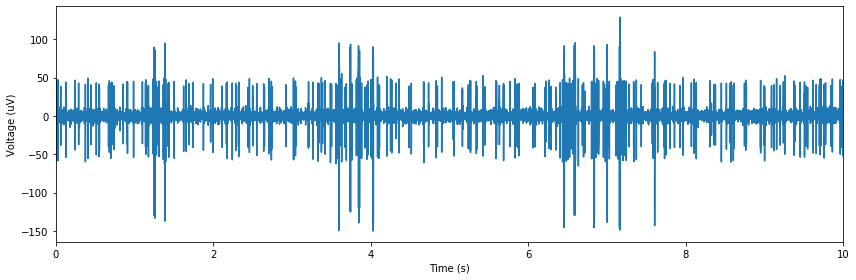

In [14]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, data)
ax.set(xlim=(times.min(), times.max()), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

c) Try "zooming in" on different sections of recording. That is, try plotting smaller segments (0.5s, 1.0s) of recordings. How would you restrict your graph to a smaller slice of data? (Hint: this can be done without changing the inputs to `ax.plot`)

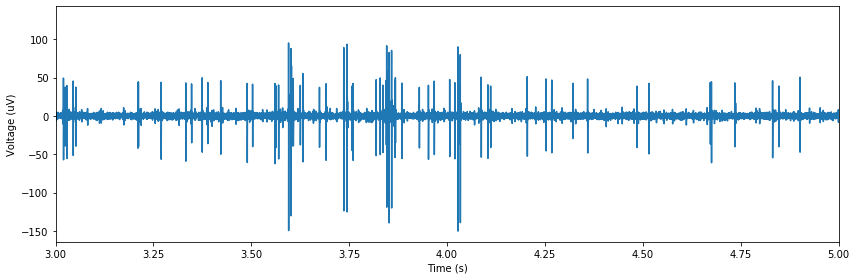

In [15]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, data)
ax.set(xlim=(3,5), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

d) [Rey et al. (2015)](https://www.sciencedirect.com/science/article/pii/S0361923015000684) suggest a simple spike detection technique via data-driven amplitude thresholding. Specifically, they propose using an amplitude threshold defined as multiple of an estimate of the standard deviation of the noise:

$$ \text{threshold} = k \cdot \hat{\sigma}_n $$

where $k$ is a constant typically between 3-5; and $\hat{\sigma}_n$ is an estimate of the standard deviation of the noise, defined as:

$$ \hat{\sigma}_n = \frac{\text{median} \left( |X| \right)}{0.6745} $$ 

where $|X|$ is the absolute value of the raw data.

Write a function that returns the amplitude threshold as defined above. The function should accept as arguments the raw data, $X$, and the constant, $k$. 

In [16]:
def find_threshold(X, k):
    """Calculate empirical amplitude threshold.
    
    Parameters
    ----------
    X : array_like, shape (n_times,)
        Raw data trace.
    k : int
        Amplitude scalar.
        
    Returns
    -------
    sigma : float
        Amplitude threshold
        
    References
    -----
    [1] Rey, H. G., Pedreira, C., & Quiroga, R. Q. (2015). Past, present and future of 
        spike sorting techniques. Brain research bulletin, 119, 106-117.
    """
    return k * np.median( np.abs(X) ) / 0.6745

e) Using your function, compute different amplitude thresholds for different values of $k$. Overlay each threshold as a horizonal line on a plot of the raw recording. (Hint: google a horizontal line function in Matplotlib.)

For different threshold levels (values of $k$), how sensitive does the threshold seem to be? In other words, how good is your threshold at detecting "true" spikes from "noise"? (To assess this, it may be helpful to zoom in on specific segments of the data.)

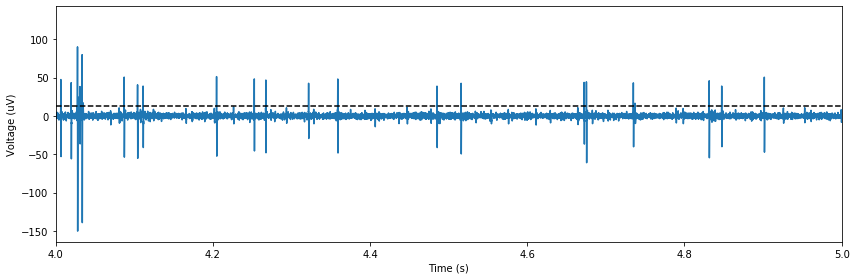

In [17]:
## Define amplitude threshold.
k = 6
thresh = find_threshold(data, k)

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, data)
ax.axhline(thresh, color='k', linestyle='--')
ax.set(xlim=(4,5), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

f) Next we need a function that can detect segments of the raw signal that exceed the threshold. This ultimately becomes a clustering problem (i.e. identifying "islands" of signal rising above an "ocean of noise"). 

Though this is definitely doable with core NumPy, the SciPy library has built-in functions specifically written for these purposes. Because these functions are beyond the scope of the bootcamp, we have provided a peak finding function for you. The function relies on the `measurements` tools from scipy.ndimage. For a tutorial, see [here](https://dragly.org/2013/03/25/working-with-percolation-clusters-in-python/).

The function, `peak_finder`, accepts a raw data trace and a threshold. It then finds all clusters of samples above the given threshold and returns:
- the indices (positions in the array) corresponding to the peak of each cluster
- the magnitude of the signal at each peak

In [18]:
def peak_finder(X, thresh):
    """Simple peak finding algorithm.
    
    Parameters
    ----------
    X : array_like, shape (n_times,)
        Raw data trace.
    thresh : float
        Amplitude threshold.
        
    Returns
    -------
    peak_loc : array_like, shape (n_clusters,)
        Index of peak amplitudes.
    peak_mag : array_like, shape (n_clusters,)
        Magnitude of peak amplitudes.
    """
    import numpy as np
    from scipy.ndimage import measurements
    
    ## Error-catching.
    assert X.ndim == 1
    
    ## Identify clusters.
    clusters, ix = measurements.label(X > thresh)
    
    ## Identify index of peak amplitudes. 
    peak_loc = np.concatenate(measurements.maximum_position(X, labels=clusters, index=np.arange(ix)+1))
    
    ## Identify magnitude of peak amplitudes.
    peak_mag = measurements.maximum(X, labels=clusters, index=np.arange(ix)+1)
    return peak_loc, peak_mag

g) Apply the peak detection algorithm to the raw data using a threshold of your choice (recommendation: $k=6$). How many spikes are detected? If you adjust the threshold up or down, how does this change the number of spikes detected?

In [19]:
## Define threshold.
threshold = find_threshold(data, k=6)

## Apply peak finding.
peak_loc, peak_mag = peak_finder(data, threshold)

## Report number of spikes detected.
print(f'{peak_mag.size} spikes detected.')

322 spikes detected.


h) Now for a challenge. First, plot the first second of the recording. Next, using a scatterplot (or any other method you can think of), plot the peak for each detected spike. In other words, each point in the scatter plot should be (time of spike (s), amplitude of spike (uV)). 

(Hint: *peak_loc* gives you the index of each spike in the data array. Remember that *data* and *times* have the same number of elements.)

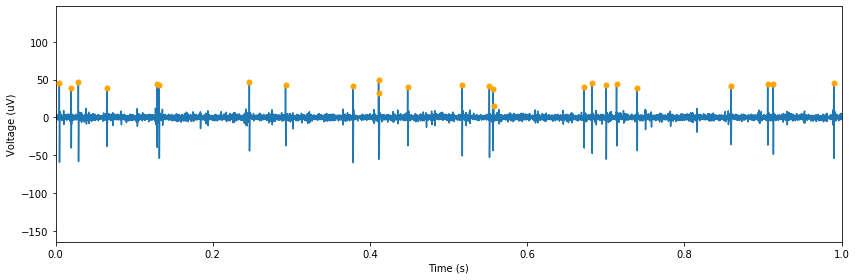

In [20]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Plot timeseries.
ax.plot(times, data)

## Plot peak onsets.
ax.scatter(times[peak_loc], peak_mag, color='orange', s=25, zorder=10)

ax.set(xlim=(0, 1), xlabel='Time (s)', ylabel='Voltage (uV)')
plt.tight_layout()

i) Remake the plot above using different thresholds. For different threshold levels (values of $k$), how sensitive does the threshold seem to be? In other words, how good is your threshold at detecting "true" spikes from "noise"? (To assess this, it may be helpful to zoom in on different segments of the data.)

j) Based on your exploration above, choose a threshold value. You will use this threshold value for the remainder of this exercise. 

Once you've selected your threshold, use `peak_finder` again to detect spikes in the recording. Then plot a histogram of the spike amplitudes it detects (try bins of 0-150 in increments of 5 uV). 

How many spikes are detected? Based on their amplitudes, how many types of spikes do there appear to be?

322 spikes detected.


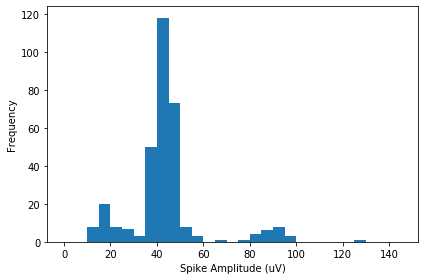

In [21]:
## Define threshold.
threshold = find_threshold(data, k=6)

## Apply peak finding.
peak_loc, peak_mag = peak_finder(data, threshold)

## Report number of spikes detected.
print(f'{peak_mag.size} spikes detected.')

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot histogram.
ax.hist(peak_mag, bins=np.arange(0,150,5))
ax.set(xlabel='Spike Amplitude (uV)', ylabel='Frequency')

plt.tight_layout()

k) Based on the plot above, define a set of boundaries that divides the spikes into different clusters. Find a NumPy function that assigns an each spike amplitude to a category based on your defined boundaries. (Hint: there are at least three.) Store the category labels in a new variable, *labels*. 

After binning, how many spikes are in each cluster?

In [22]:
## Define boundaries.
boundaries = [30, 70]

## Define spike labels.
labels = np.where(peak_mag > boundaries[1], 2, np.where(peak_mag > boundaries[0], 1, 0))

## Count each labels.
_, counts = np.unique(labels, return_counts=True)
print(counts)

[ 43 256  23]


m) **CHALLENGE**: Action potentials last roughly 1-2 milliseconds. With this in mind, extract a 3 ms window around each detected spike; that is, extract 1.5 ms of samples on either side of the detected peak. Store each epoch in a separate list according to its cluster. (Hint: The data were recorded at 10 KHz meaning there are 10 samples per millisecond.)

This is a challenging exercise that can be solved in many different ways. Before jumping in, take a few minutes to brainstorm pseudocode with your team. That is, write out in words each step you need to take to solve this problem.

In [23]:
## Cluster 1.
spikes_c1 = np.zeros((counts[0], 30))
for i, loc in enumerate(peak_loc[labels==0]):
    spikes_c1[i] = data[loc-15:loc+15]
    
## Cluster 2.
spikes_c2 = np.zeros((counts[1], 30))
for i, loc in enumerate(peak_loc[labels==1]):
    spikes_c2[i] = data[loc-15:loc+15]
    
## Cluster 3.
spikes_c3 = np.zeros((counts[2], 30))
for i, loc in enumerate(peak_loc[labels==2]):
    spikes_c3[i] = data[loc-15:loc+15]

n) Compute the average spike waveform for each cluster. Then, plot each average waveform in a single plot. Add a legend denoting the spike cluster.

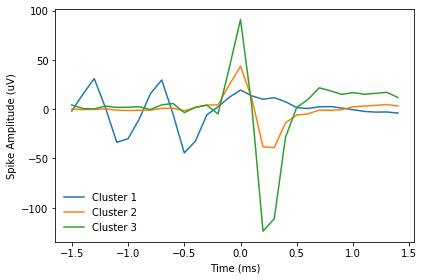

In [24]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(6,4))

## Plot average waveform.
for i, spikes in enumerate([spikes_c1, spikes_c2, spikes_c3]):
    ax.plot(np.arange(-1.5,1.5,0.1), spikes.mean(axis=0), label=f'Cluster {i+1}')

## Add details.
ax.set(xlabel='Time (ms)', ylabel='Spike Amplitude (uV)')
ax.legend(loc=3, frameon=False)
    
plt.tight_layout()

# Bonus Exercises (Pandas + Seaborn)

### Background: Deep Brain stimulation

In this set of exercises, you will perfrom part of the analysis from [Widge et al. (2019)](https://www.nature.com/articles/s41467-019-09557-4), *Deep brain stimulation of the internal capsule enhances human cognitive control and prefrontal cortex function*. In this paper, the authors found that deep brain stimulation (DBS) of the ventral striatum improved performance on a task of cognitive flexibility in a sample of 14 patients with severe depression. Specifically, response times on the task decreased (speeded up) with their DBS devices turned on.

To recreate some of the analyses and figures, you will use Pandas, Seaborn, and SciPy.stats. 

### Methods
To probe cognitive flexibility, the authors employed a modified version of the Multi-Source Interference Task (MSIT). The MSIT requires subjects to identify which of a set of three numbers is different than its neighbors. Subjects must keep three fingers of their right hand positioned over response keys corresponding to the digits 1-3. In **Control** (non-interference) trials, the target is in the same spatial position as its corresponding response key, and the flanking digits are not valid responses (i.e., they are 0s). In **Interference trials**, the target is out-of-position relative to its corresponding key-press and is flanked by other viable targets. 

Each block of trials contained 72 Control and 72 Interference trials. To prevent response sets or habituation, trial sequence in each block was pseudo-randomized so that subjects never had more than two trials in a row that shared the same interference level or desired response finger. This highly interleaved trial design was expected to place greater demands on cognitive control systems by reducing predictability of the stimuli. 

Patients performed this task twice: first with their DBS device turned **ON**, and then with their DBS device turned **OFF**.

### Data

The file *dbs.csv* contains the raw behavioral data from the 14 patients. The data is organized into six columns:

- *Subject:* the unique subject identifier.
- *Trial:* the trial number per block.
- *DBS:* the status of the DBS device (ON = 1, OFF = 0)
- *Interference:* the type of trial (Control = 0, Interference = 1)
- *Accuracy:* the accuracy of the response of the trial (Correct = 1, Incorrect = 0)
- *RT:* the response time on that trial (in seconds).

## Section 1: Preprocessing

a) Read in the DataFrame from the CSV file, *dbs.csv*.

In [4]:
import pandas as pd
dbs=pd.read_csv('dbs.csv')
dbs.head()

,Subject,Trial,DBS,Interference,Accuracy,RT
0,1,1,0,0,1,0.611526
1,1,2,0,1,1,0.728040
2,1,3,0,0,1,0.481867
3,1,4,0,0,1,0.512290
4,1,5,0,1,1,0.656878


b) Using `DataFrame.value_counts`, confirm there are 14 patients with 288 trials each.

In [7]:
dbs.value_counts(subset=['Subject','Trial'])

Subject  Trial
14       144      2
5        101      2
         88       2
         89       2
         90       2
                 ..
10       53       2
         54       2
         55       2
         56       2
1        1        2
Length: 2016, dtype: int64

c) Using `DataFrame.groupby`, compute the average accuracy per participant. Should any participant be excluded (e.g. lower than 70% accuracy)?

In [14]:
ACC_THRESH = 0.7
for s,s_data in dbs.groupby('Subject'):
    acc = s_data['Accuracy'].mean()
    if acc < ACC_THRESH:
        print(s)

d) Response times for trials with incorrect responses are typically biased. In other words, they tend to be systematically faster than the average response (i.e. fast error) or slower than the average response (i.e. slow errors). 

Remove all rows corresponding to trials with incorrect responses. Confirm no incorrect responses remain.

In [16]:
dbs_correct = dbs[dbs['Accuracy']==1]
dbs_correct.query('Accuracy==0')

,Subject,Trial,DBS,Interference,Accuracy,RT


e) Similarly, participants occasionally make unrealistic fast responses (e.g. < 300 ms). These typically correspond to accidental button presses or slips of the finger.

Remove all rows corresponding to trials with response times faster than 300 ms. Confirm the mininum response time per participant is above this threshold.

In [25]:
SPEED_THRESH=0.3
dbs_real = dbs_correct[dbs_correct['RT']>SPEED_THRESH]
dbs_real.query('RT <= %f'%SPEED_THRESH)

,Subject,Trial,DBS,Interference,Accuracy,RT


f) Reaction times are typically right-skewed. That is, on average, a distribution of reaction times is asymmetric with more responses falling on the slower side.

Using `sns.FacetGrid` (or any other plotting method of your choosing), plot the RT distribution per participant. Confirm that all (or most) RT distributions are right-skewed.

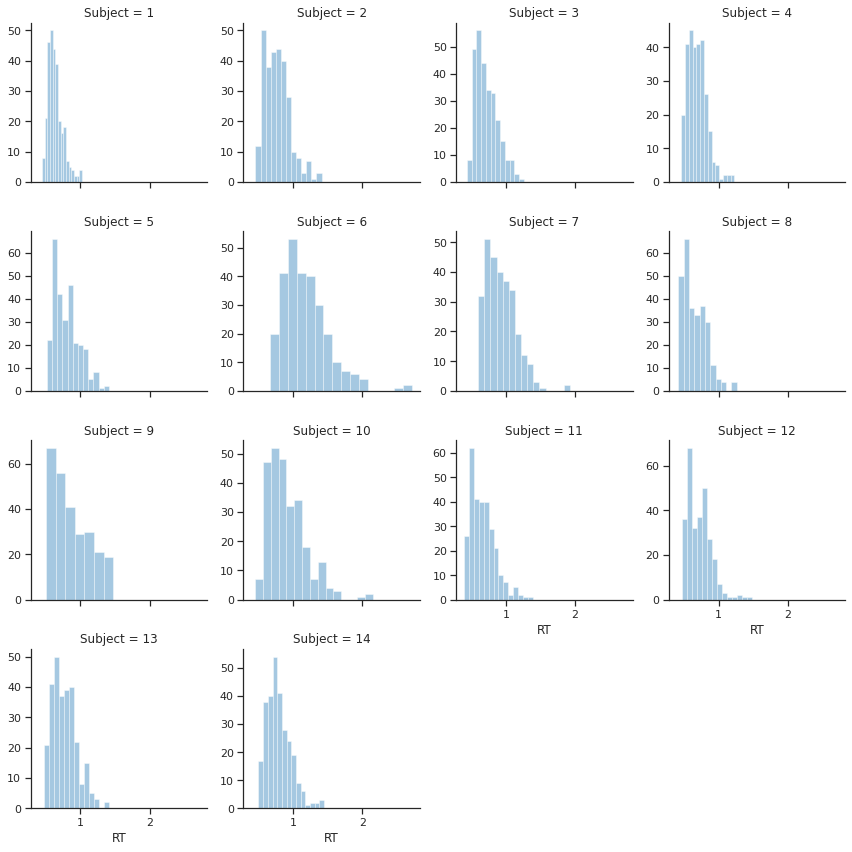

In [27]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook')

g = sns.FacetGrid(dbs_real, col='Subject', col_wrap=4, 
                  sharex=True, sharey=False)

g.map(sns.distplot, 'RT', kde=False)

g) To correct for right-skew, some analysts apply a log transform to reaction time data. 

Make a new column in the DataFrame, **logRT**, that is applying a log transform the RT data.

In [32]:
import numpy as np
dbs_real['logRT'] = np.log(dbs_real['RT'])

h) Write a z-score function. The z-score is defined as:

$$ Z = \frac{X - \text{mean}(X)}{\text{sd}(X)} $$

In [30]:
def zscore(arr): 
    """Return z-scored array"""
    return (arr - arr.mean()) / arr.std()

i) Apply the z-score transformation to the log reaction times (logRT) *per subject*. This has the effect of normalizing all participants' data to be in a similar range (e.g. removes baseline differences in RTs). Store the z-scored values in a new DataFrame column, **zRT**.



Hint: Remember `DataFrame.groupby` and `DataFrame.apply`.

In [35]:
grouped_dbs = dbs_real.groupby('Subject')
dbs_real['zRT'] = grouped_dbs.apply(lambda x: zscore(x.logRT)).values

## Section 2: Visualization

a) Using Seaborn, visualize the difference in (z-scored) reaction times as a function of interference. Try out different plotting styles and see what you like best.

In [38]:
dbs_real.Interference

0       0
1       1
2       0
3       0
4       1
       ..
4027    0
4028    1
4029    1
4030    0
4031    1
Name: Interference, Length: 3930, dtype: int64

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


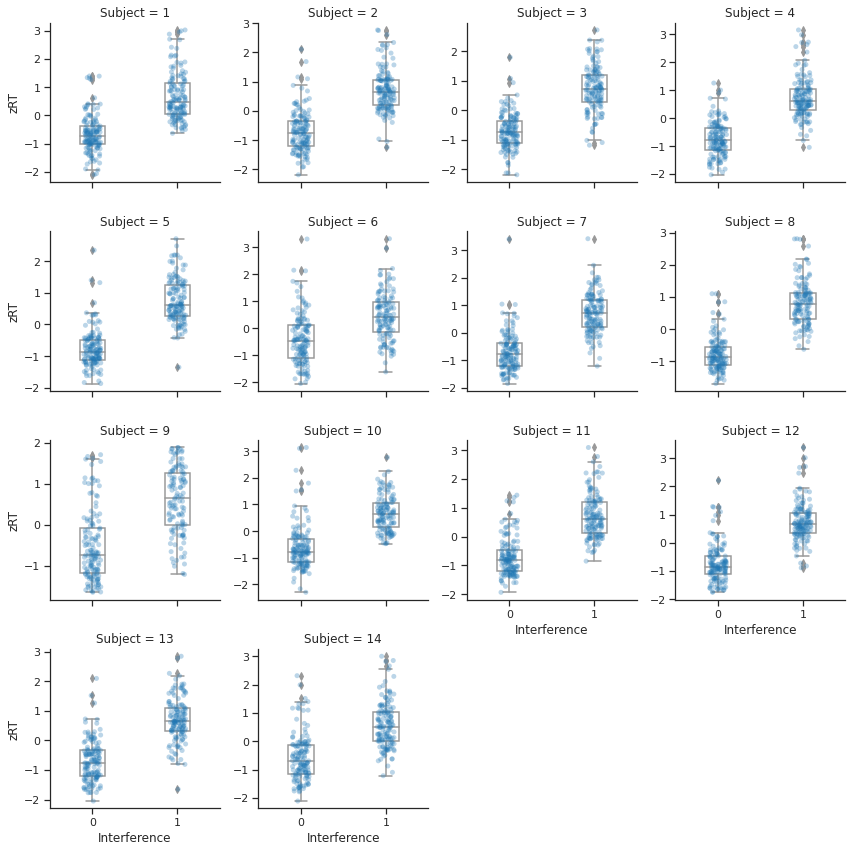

In [66]:
g = sns.FacetGrid(dbs_real, col='Subject', col_wrap=4, 
                  sharex=True, sharey=False)

g.map(sns.stripplot,'Interference', 'zRT',alpha=0.3)
g.map(sns.boxplot,'Interference', 'zRT',color='white',width=0.3)

b) Using Seaborn, visualize the difference in (z-scored) reaction times as a function of DBS. Try out different plotting styles and see what you like best. Which contrast (interferece vs. DBS) seems to have the larger effect?

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


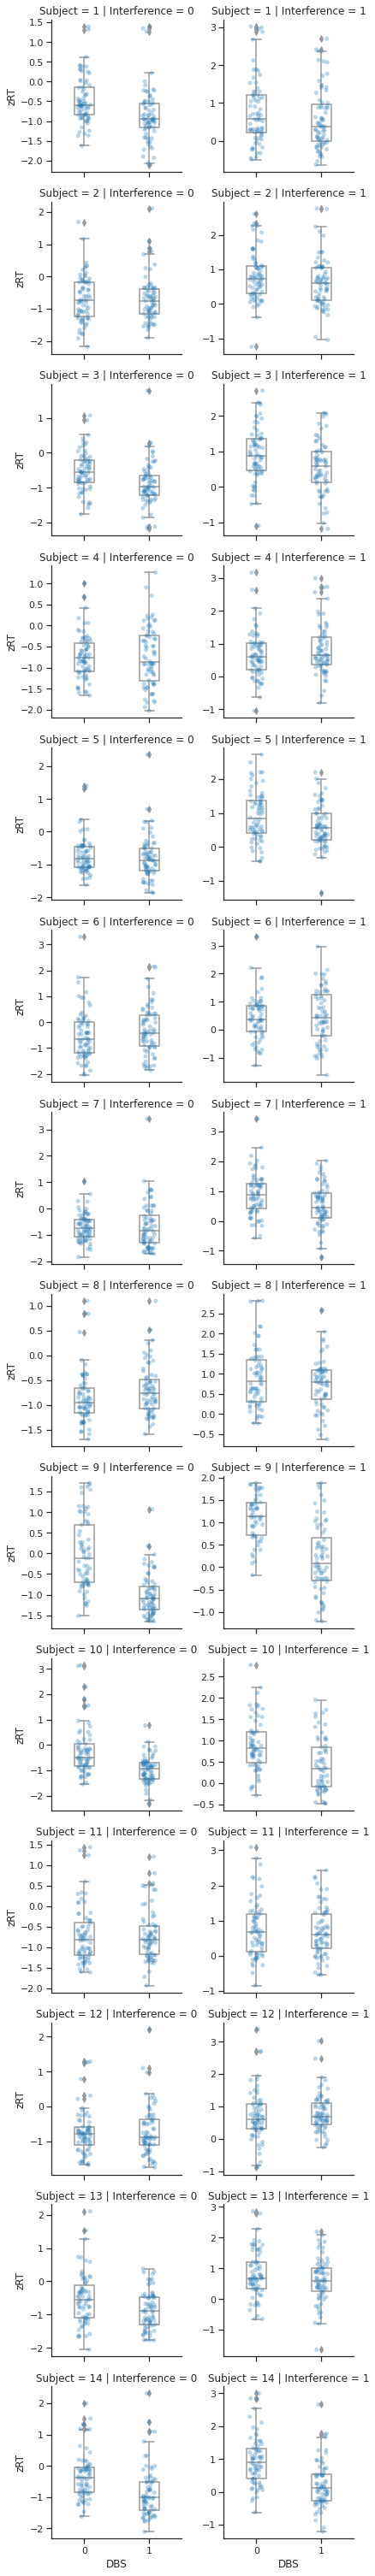

In [67]:
g = sns.FacetGrid(dbs_real, row='Subject', col='Interference', 
                  sharex=True, sharey=False)

g.map(sns.stripplot,'DBS', 'zRT',alpha=0.3)
g.map(sns.boxplot,'DBS', 'zRT',color='white',width=0.3)

c) As an optional challenge, try to plot both contrasts (ON vs. OFF, Control vs. Intereference) simultaneously. 

Hint: Read up on the `hue` argument in Seaborn.

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


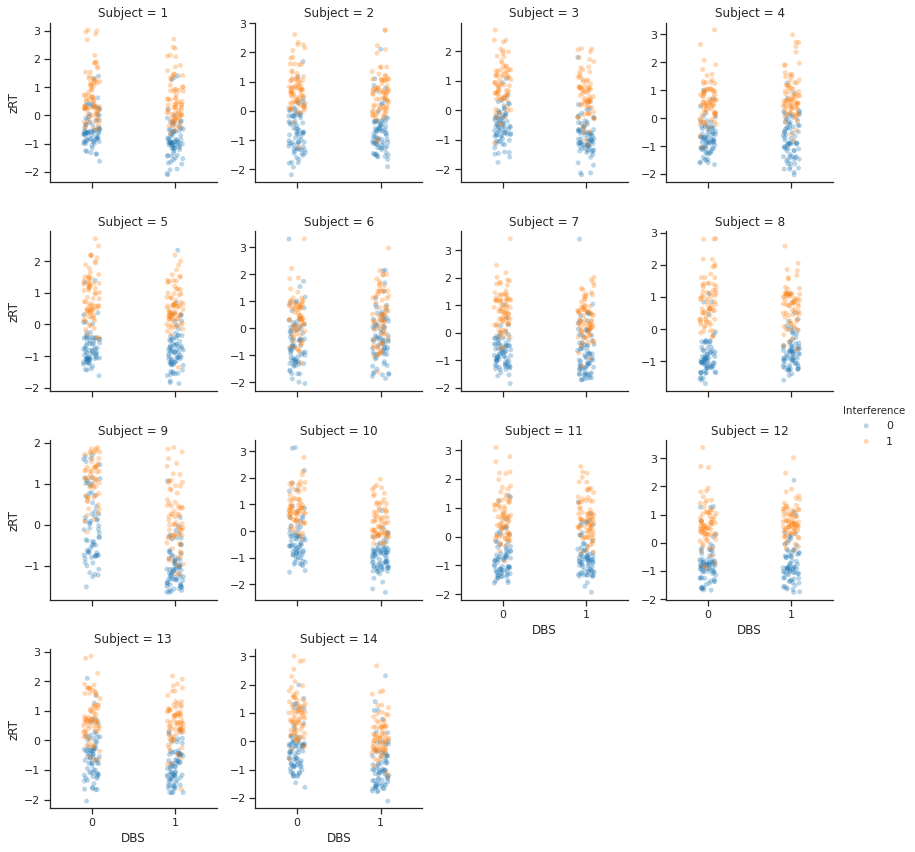

In [69]:
g = sns.FacetGrid(dbs_real, col='Subject', hue='Interference',
                  col_wrap=4, 
                  sharex=True, sharey=False)

g.map(sns.stripplot,'DBS', 'zRT',alpha=0.3)
g.add_legend()

## Section 3: Statistics

a) Use `DataFrame.groupby` to calculate the average z-scored response time difference (collapsing across patients) for both contrasts (i.e. Inteference - Control, DBS ON - DBS OFF).

In [56]:
IC_contrast={0:[],1:[]}
DB_contrast={0:[],1:[]}

for s,s_data in dbs.groupby('Subject'):
    
    for ic,d in s_data.groupby('Interference'):
        acc = d['Accuracy'].mean()
        IC_contrast[ic].append(acc)
        
    for db,d in s_data.groupby('DBS'):
        acc = d['Accuracy'].mean()
        DB_contrast[db].append(acc)

b) Perform an independent samples t-test to test for significance differences in the two contrasts. Which effect is larger?

In [60]:
from scipy.stats import ttest_rel
for d in [IC_contrast,DB_contrast]:
    print(ttest_rel(d[0],d[1]))

Ttest_relResult(statistic=2.901461988498215, pvalue=0.012373145631965581)
Ttest_relResult(statistic=-1.4356141618164957, pvalue=0.17473470689596068)


In [89]:
## Advanced: a mixed linear model can infer different
## "random effects" of variables within subjects instead
## of "fixed effects" across subjects

import statsmodels.formula.api as smf
md = smf.mixedlm("zRT ~ Interference * DBS", dbs_real,
                 re_formula="~ Interference * DBS",
                  groups=dbs_real["Subject"])
mdf = md.fit()
print(mdf.summary())
print(mdf.pvalues)

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2133: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        zRT       
No. Observations:         3930           Method:                    REML      
No. Groups:               14             Scale:                     0.4971    
Min. group size:          263            Log-Likelihood:            -4242.6631
Max. group size:          288            Converged:                 Yes       
Mean group size:          280.7                                               
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                           -0.554    0.059 -9.381 0.000 -0.669 -0.438
Interference                         1.376    0.056 24.533 0.000  1.266  1.486
DBS                                 -0.217    0.089 -2.431 0.015 -0.393 -

/usr/people/willmore/.conda/envs/umap/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
